In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.datasets import fetch_openml


In [ ]:
# Load datasets
def load_datasets():
    adult = fetch_openml(name='adult', version=2, as_frame=True)
    cancer = load_breast_cancer(as_frame=True)
    diabetes = load_diabetes(as_frame=True)
    arrhythmia = fetch_openml(name='arrhythmia', version=1, as_frame=True)

    return adult, cancer, diabetes, arrhythmia


adult, cancer, diabetes, arrhythmia = load_datasets()

# Access the adult dataset
# adult_dataframe = adult['data']
# adult_target = adult['target']

# cancer_dataframe = cancer['data']
# cancer_target = cancer['target']

# diabetes_dataframe = diabetes['data']
# diabetes_target = diabetes['target']

# arrhythmia_dataframe = arrhythmia['data']
# arrhythmia_target = arrhythmia['target']


# adult_df = pd.concat([adult['data'], adult['target']], axis=1)
# cancer_df = pd.concat([cancer['data'], cancer['target']], axis=1)
# diabetes_df = pd.concat([diabetes['data'], diabetes['target']], axis=1)
# arrhythmia_df = pd.concat([arrhythmia['data'], arrhythmia['target']], axis=1)

# Display the first few rows of the adult DataFrame


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_data(X, y=None):
    # Create a copy of the dataframe to avoid modifying the original data
    X_encoded = X.copy()

    # Identify categorical columns
    categorical_cols = X_encoded.select_dtypes(include=['category', 'object']).columns

    # Apply LabelEncoder to each categorical column
    for col in categorical_cols:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

    # If target `y` is provided, encode it as well
    y_encoded = None
    if y is not None:
        le_target = LabelEncoder()
        y_encoded = le_target.fit_transform(y)

    return X_encoded, y_encoded

# Example usage:
adult, cancer, diabetes, arrhythmia = load_datasets()

# Apply encoding to the features and target:
adult_X_encoded, adult_y_encoded = encode_categorical_data(adult.data, adult.target)
cancer_X_encoded, cancer_y_encoded = encode_categorical_data(cancer.data, cancer.target)
diabetes_X_encoded, diabetes_y_encoded = encode_categorical_data(diabetes.data, diabetes.target)
arrhythmia_X_encoded, arrhythmia_y_encoded = encode_categorical_data(arrhythmia.data, arrhythmia.target)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Split datasets into training, validation, and statistical data
def split_data(dataset,target):
    X_train, X_temp, y_train, y_temp = train_test_split(dataset, target, test_size=0.4, random_state=42)
    X_val, X_stat, y_val, y_stat = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
    return X_train, X_val, X_stat, y_train, y_val, y_stat

X_train_ad, X_val_ad, X_stat_ad, y_train_ad, y_val_ad, y_stat_ad=split_data(adult_X_encoded, adult_y_encoded)
X_train_cn, X_val_cn, X_stat_cn, y_train_cn, y_val_cn, y_stat_cn=split_data(cancer_X_encoded, cancer_y_encoded)
X_train_db, X_val_db, X_stat_db, y_train_db, y_val_db, y_stat_db=split_data(diabetes_X_encoded, diabetes_y_encoded)
X_train_ar, X_val_ar, X_stat_ar, y_train_ar, y_val_ar, y_stat_ar=split_data(arrhythmia_X_encoded, arrhythmia_y_encoded)

In [ ]:
#Train the victim model
def train_victim_model(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    model = MLPClassifier(hidden_layer_sizes=(90, 90, 90), learning_rate_init=0.01, max_iter=30)
    model.fit(X_train_scaled, y_train)

    return model, scaler


victim_model_ad, scaler_ad = train_victim_model(X_train_ad, y_train_ad)
victim_model_cn, scaler_cn = train_victim_model(X_train_cn, y_train_cn)
victim_model_db, scaler_db = train_victim_model(X_train_db, y_train_db)
# victim_model_ar, scaler_ar = train_victim_model(X_train_ar, y_train_ar)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train_ad)
# X_test = scaler.transform(X_val_ad)

# # Convert data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train_ad, dtype=torch.float32).view(-1, 1)
# y_test_tensor = torch.tensor(y_val_ad, dtype=torch.float32).view(-1, 1)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# class VictimModel(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(VictimModel, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 128),
#             nn.ReLU(),
#             nn.Linear(128, 128),  # Added third hidden layer
#             nn.ReLU(),
#             nn.Linear(128, 128),  # Added fourth hidden layer
#             nn.ReLU(),
#             nn.Linear(128, 128),  # Added fifth hidden layer
#             nn.ReLU(),
#             nn.Linear(128, 128),  # Added sixth hidden layer
#             nn.ReLU(),
#             nn.Linear(128, output_dim)
#         )

#     def forward(self, x):
#         return self.model(x)

# # Initialize and train the teacher model
# input_dim = X_train_ad.shape[1]
# output_dim = 1  # Binary classification
# teacher_model = VictimModel(input_dim, output_dim)

# criterion = nn.BCEWithLogitsLoss()  # Suitable for binary classification
# optimizer = optim.Adam(teacher_model.parameters(), lr=0.001)

# # Training loop
# def train_model(model, criterion, optimizer, X_train, y_train, epochs=50):
#     for epoch in range(epochs):
#         model.train()
#         optimizer.zero_grad()
#         outputs = model(X_train)
#         loss = criterion(outputs, y_train)
#         loss.backward()
#         optimizer.step()

# train_model(teacher_model, criterion, optimizer, X_train_tensor, y_train_tensor)

# # Evaluate the teacher model
# teacher_model.eval()
# with torch.no_grad():
#     y_pred_teacher = torch.sigmoid(teacher_model(X_test_tensor)).numpy().flatten()
#     y_pred_teacher_binary = (y_pred_teacher > 0.5).astype(int)
#     print("Teacher Model Accuracy:", accuracy_score(y_val_ad, y_pred_teacher_binary))



# # victim_model_ad, scaler_ad = train_victim_model(X_train_ad, y_train_ad)
# # victim_model_cn, scaler_cn = train_victim_model(X_train_cn, y_train_cn)
# # victim_model_db, scaler_db = train_victim_model(X_train_db, y_train_db)

In [ ]:
# Generate query data using statistical information (mean and variance)
def generate_query_data(X_stat, num_samples):
    query_data = pd.DataFrame()

    for col in X_stat.columns:
        if np.issubdtype(X_stat[col].dtype, np.number):
            mean = X_stat[col].mean()
            std = X_stat[col].std()
            # Generate numeric data from a normal distribution
            query_data[col] = np.random.normal(loc=mean, scale=std, size=num_samples)
        else:
            # For categorical data, randomly sample from the observed categories
            query_data[col] = np.random.choice(X_stat[col].unique(), size=num_samples, p=X_stat[col].value_counts(normalize=True).values)

    return query_data


# Generate query data for each dataset
query_data_ad = generate_query_data(X_stat_ad, num_samples=100000)
query_data_cn = generate_query_data(X_stat_cn, num_samples=100000)
query_data_db = generate_query_data(X_stat_db, num_samples=100000)


In [ ]:
len(X_stat_ad)

4885

In [ ]:
# Train the substitute model
from sklearn.ensemble import RandomForestClassifier
def train_substitute_model(query_data, victim_model, scaler):
    query_data_scaled = scaler.transform(query_data)
    y_query = victim_model.predict(query_data_scaled)
    # y_query = victim_model.predict(query_data)

    substitute_model = RandomForestClassifier()
    # substitute_model.fit(query_data, y_query)
    substitute_model.fit(query_data_scaled, y_query)

    return substitute_model


substitute_model_ad =train_substitute_model(query_data_ad, victim_model_ad, scaler_ad)
substitute_model_cn =train_substitute_model(query_data_cn, victim_model_cn, scaler_cn)
substitute_model_db =train_substitute_model(query_data_db, victim_model_db, scaler_db)


In [ ]:
# Evaluate the models
def evaluate_models(victim_model, substitute_model, X_val, y_val, scaler):
    X_val_scaled = scaler.transform(X_val)

    victim_preds = victim_model.predict(X_val_scaled)
    substitute_preds = substitute_model.predict(X_val_scaled)

    victim_acc = accuracy_score(y_val, victim_preds)
    substitute_acc = accuracy_score(y_val, substitute_preds)

    fidelity = accuracy_score(victim_preds, substitute_preds)

    return victim_acc, substitute_acc, fidelity


victim_acc_ad, substitute_acc_ad, fidelity_ad = evaluate_models(victim_model_ad, substitute_model_ad, X_val_ad, y_val_ad, scaler_ad)
victim_acc_cn, substitute_acc_cn, fidelity_cn = evaluate_models(victim_model_cn, substitute_model_cn, X_val_cn, y_val_cn, scaler_cn)
victim_acc_db, substitute_acc_db, fidelity_db = evaluate_models(victim_model_db, substitute_model_db, X_val_db, y_val_db, scaler_db)


In [ ]:
print(f"Adult Dataset:")
print(f"Victim Model Accuracy for adult: {victim_acc_ad:.2f}")
print(f"Substitute Model Accuracy for adult: {substitute_acc_ad:.2f}")
print(f"Model Fidelity for adult: {fidelity_ad:.2f}")

print(f"\nCancer Dataset:")

print(f"Victim Model Accuracy for cancer: {victim_acc_cn:.2f}")
print(f"Substitute Model Accuracy for cancer: {substitute_acc_cn:.2f}")
print(f"Model Fidelity for cancer: {fidelity_cn:.2f}")

print(f"\nDiabetes Dataset:")

print(f"Victim Model Accuracy for diabetes: {victim_acc_db:.2f}")
print(f"Substitute Model Accuracy for diabetes: {substitute_acc_db:.2f}")
print(f"Model Fidelity for diabetes: {fidelity_db:.2f}")



Adult Dataset:
Victim Model Accuracy for adult: 0.85
Substitute Model Accuracy for adult: 0.85
Model Fidelity for adult: 0.93

Cancer Dataset:
Victim Model Accuracy for cancer: 0.96
Substitute Model Accuracy for cancer: 0.97
Model Fidelity for cancer: 0.97

Diabetes Dataset:
Victim Model Accuracy for diabetes: 0.00
Substitute Model Accuracy for diabetes: 0.00
Model Fidelity for diabetes: 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


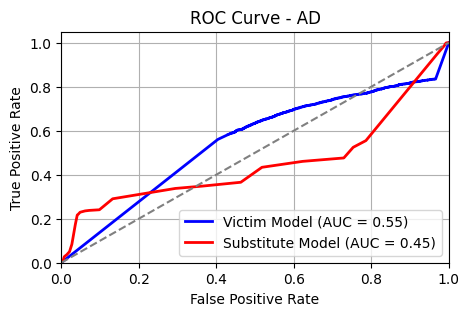

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


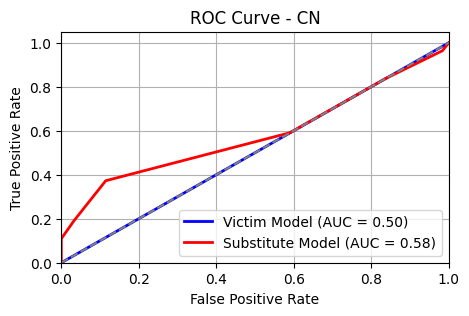

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_val, victim_probs, substitute_probs, title):
    # Compute ROC curve for victim and substitute models
    fpr_victim, tpr_victim, _ = roc_curve(y_val, victim_probs)
    fpr_substitute, tpr_substitute, _ = roc_curve(y_val, substitute_probs)

    # Compute AUC
    auc_victim = auc(fpr_victim, tpr_victim)
    auc_substitute = auc(fpr_substitute, tpr_substitute)

    # Plot ROC curves
    plt.figure(figsize=(5, 3))
    plt.plot(fpr_victim, tpr_victim, color='blue', lw=2, label=f'Victim Model (AUC = {auc_victim:.2f})')
    plt.plot(fpr_substitute, tpr_substitute, color='red', lw=2, label=f'Substitute Model (AUC = {auc_substitute:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Generate predicted probabilities
victim_probs_ad = victim_model_ad.predict_proba(X_val_ad)[:, 1]
substitute_probs_ad = substitute_model_ad.predict_proba(X_val_ad)[:, 1]
plot_roc_curve(y_val_ad, victim_probs_ad, substitute_probs_ad, 'ROC Curve - AD')

victim_probs_cn = victim_model_cn.predict_proba(X_val_cn)[:, 1]
substitute_probs_cn = substitute_model_cn.predict_proba(X_val_cn)[:, 1]
plot_roc_curve(y_val_cn, victim_probs_cn, substitute_probs_cn, 'ROC Curve - CN')

# victim_probs_db = victim_model_db.predict_proba(X_val_db)[:, 1]
# substitute_probs_db = substitute_model_db.predict_proba(X_val_db)[:, 1]
# plot_roc_curve(y_val_db, victim_probs_db, substitute_probs_db, 'ROC Curve - DB')


In [ ]:
# Main experiment function
def run_experiment():
    adult, cancer, diabetes, arrhythmia = load_datasets()

    for dataset, name in zip([adult, cancer, diabetes, arrhythmia], ["Adult", "Cancer", "Diabetes", "Arrhythmia"]):
        X_train, X_val, X_stat, y_train, y_val, y_stat = split_data(dataset)

        victim_model, scaler = train_victim_model(X_train, y_train)


In [ ]:
  # Generate query data, using the size of X_stat for the number of samples
  query_data = generate_query_data(X_stat, num_samples=len(X_stat))

  substitute_model = train_substitute_model(query_data, victim_model, scaler)

  victim_acc, substitute_acc, fidelity = evaluate_models(victim_model, substitute_model, X_val, y_val, scaler)

  print(f"Dataset: {name}")
  print(f"Victim Model Accuracy: {victim_acc:.2f}")
  print(f"Substitute Model Accuracy: {substitute_acc:.2f}")
  print(f"Model Fidelity: {fidelity:.2f}")
  print("-----------")


NameError: name 'X_stat' is not defined